In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/ABC_Customers.csv')


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


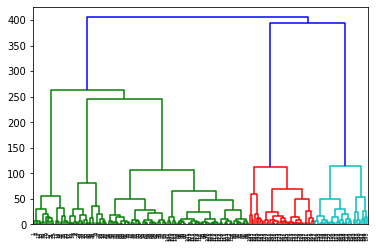

In [8]:
print(df)

X = df.iloc[:, [3, 4]]
# explore using dendogram
import scipy.cluster.hierarchy as hierarchy 
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, 'ward'))
# plt.imshow(dendrogram)
plt.show()

Dendrograms cannot tell you how many clusters you should have

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


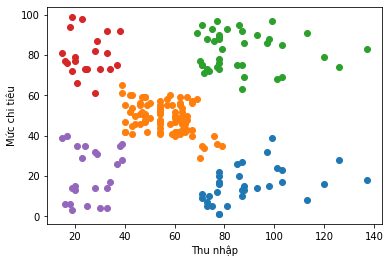

In [15]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 5
ac = AgglomerativeClustering(n_clusters=n_clusters, affinity = 'euclidean', linkage = 'ward')
Y = hc.fit_predict(X)

# show prediction values 
print(Y)
for i in range(5):
    plt.scatter(X.iloc[Y==i, 0], X.iloc[Y==i, 1])

plt.xlabel("Thu nhập")
plt.ylabel("Mức chi tiêu")
plt.show()

# Sử dụng 4 giải thuật KMeans, AgglomerativeClustering, DBSCAN, MeanShift


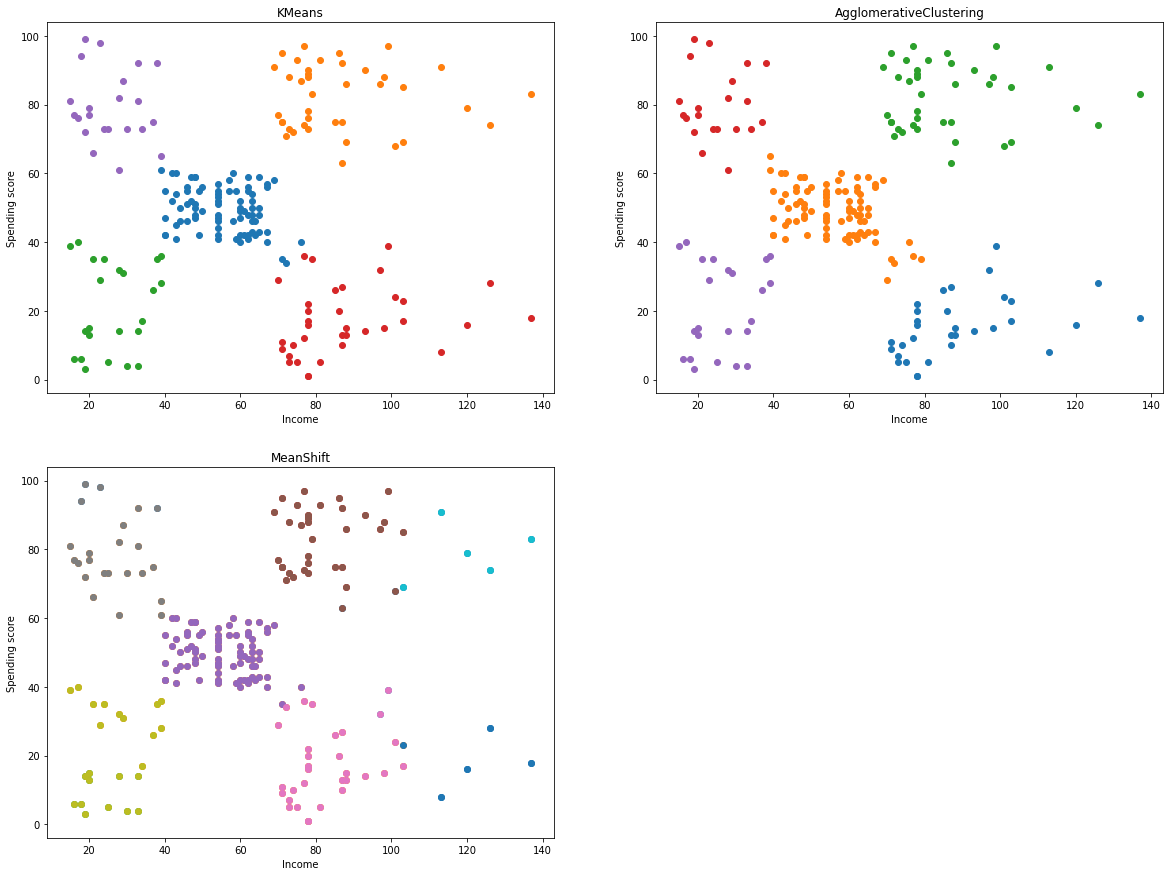

In [49]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, estimate_bandwidth

fig = plt.figure(figsize=(20,15))
X = df.iloc[:, [3, 4]]

n_clusters = 5
# sử dụng KMeans
kmeans = KMeans(n_clusters=n_clusters).fit(X)
Y = kmeans.predict(X)

ax = fig.add_subplot(221)
ax.set_title("KMeans")
ax.set_xlabel("Income")
ax.set_ylabel("Spending score")

for i in range(n_clusters):
    ax.scatter(X.iloc[Y==i, 0], X.iloc[Y==i, 1])

# sử dụng AgglomerativeClustering
n_clusters = 5
ac = AgglomerativeClustering(n_clusters=n_clusters, affinity = 'euclidean', linkage = 'ward')
Y = ac.fit_predict(X)

ax = fig.add_subplot(222)
ax.set_title("AgglomerativeClustering")
ax.set_xlabel("Income")
ax.set_ylabel("Spending score")
for i in range(n_clusters):
    ax.scatter(X.iloc[Y==i, 0], X.iloc[Y==i, 1])

# DBScan
import numpy as np
db_scan = DBSCAN(eps=11, min_samples=6).fit(X)
Y = np.array(db_scan.labels_)
labels = np.unique(Y)

ax = fig.add_subplot(223)
ax.set_title("DBSCAN")
ax.set_xlabel("Income")
ax.set_ylabel("Spending score")

for i in labels:
    ax.scatter(X.iloc[Y==i, 0], X.iloc[Y==i, 1])

# MeanShift
bandwidth = estimate_bandwidth(X, quantile=0.1)
mean_shift = MeanShift(bandwidth).fit(X)
Y = np.array(mean_shift.labels_)
labels = np.unique(Y)

ax = fig.add_subplot(224)
ax.set_title("MeanShift")
ax.set_xlabel("Income")
ax.set_ylabel("Spending score")

for i in labels:
    ax.scatter(X.iloc[Y==i, 0], X.iloc[Y==i, 1])
